In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from groupby_helper import GroupbyHelper
from plot_helper import PlotHelper
import warnings

warnings.filterwarnings("ignore")

In [227]:
df = pd.read_csv('airbnb_listings_clean_data.csv')

<h1 style='color: #ff526f; font-family: "Orbitron"'> Data Exploration</h1>

In [228]:
df.head(3)   # first 3 rows

,host_id,host_name,property_type,bedrooms,beds,bathrooms,ratings,neighbourhood,latitude,longitude,room_type,daily_price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8028,Sylvia,Guesthouse,1.0,2,1.0,4.84,78702,30.26057,-97.73441,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42
1,8186,Elizabeth,Home,1.0,1,1.0,4.90,78729,30.45697,-97.78422,Private room,45,1,290,2023-08-04,1.77,1,0,21
2,13879,Todd,Guesthouse,0.5,1,1.0,4.97,78704,30.24885,-97.73587,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3


In [229]:
df.tail(3)   # last 3 rows

,host_id,host_name,property_type,bedrooms,beds,bathrooms,ratings,neighbourhood,latitude,longitude,room_type,daily_price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
9597,247023420,Bon Voyage,Rental unit,2.0,4,2.0,5.00,78702,30.263453,-97.734747,Entire home/apt,149,3,3,2023-09-08,3.0,7,131,3
9598,274552333,Evonify,Rental unit,1.0,2,1.0,3.75,78741,30.235540,-97.724480,Entire home/apt,133,1,4,2023-09-04,4.0,126,340,4
9599,533303454,Joby,Home,4.0,9,2.5,5.00,78721,30.275258,-97.687154,Entire home/apt,183,1,3,2023-09-04,3.0,1,266,3


In [230]:
df.info()   # concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         9600 non-null   int64  
 1   host_name                       9600 non-null   object 
 2   property_type                   9600 non-null   object 
 3   bedrooms                        9600 non-null   float64
 4   beds                            9600 non-null   int64  
 5   bathrooms                       9600 non-null   float64
 6   ratings                         9600 non-null   float64
 7   neighbourhood                   9600 non-null   int64  
 8   latitude                        9600 non-null   float64
 9   longitude                       9600 non-null   float64
 10  room_type                       9600 non-null   object 
 11  daily_price                     9600 non-null   int64  
 12  minimum_nights                  96

In [231]:
df.shape    # 9600 rows and 19 colums

(9600, 19)

In [232]:
df['neighbourhood'] = df['neighbourhood'].astype(object)    # should be a categorical value

In [233]:
df.describe() # get statistical summary for numerical columns

,host_id,bedrooms,beds,bathrooms,ratings,latitude,longitude,daily_price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,9.600000e+03,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000,9600.000000
mean,1.345408e+08,2.062813,2.805625,1.642292,4.835458,30.279070,-97.749724,230.474583,6.011667,57.446146,1.793016,9.197917,157.966563,15.741875
std,1.536274e+08,1.338742,2.445729,0.914693,0.248389,0.063234,0.063876,351.235223,28.234867,92.513057,1.768172,19.930607,131.323732,19.095126
min,2.300000e+01,0.500000,1.000000,0.000000,0.000000,30.078440,-98.053350,10.000000,1.000000,3.000000,0.020000,1.000000,0.000000,0.000000
25%,1.395554e+07,1.000000,1.000000,1.000000,4.780000,30.240609,-97.768433,92.000000,1.000000,9.000000,0.460000,1.000000,29.000000,2.000000
50%,6.062818e+07,2.000000,2.000000,1.000000,4.910000,30.265945,-97.738831,142.000000,2.000000,24.000000,1.290000,2.000000,140.000000,9.000000
75%,2.225726e+08,3.000000,3.000000,2.000000,5.000000,30.307555,-97.716017,243.000000,3.000000,62.000000,2.590000,6.000000,301.000000,23.000000
max,5.333035e+08,23.000000,61.000000,17.000000,5.000000,30.510093,-97.574010,10000.000000,1124.000000,1141.000000,26.250000,126.000000,365.000000,258.000000


In [234]:
df.describe(include='object') # summary for non-numeric columns

,host_name,property_type,neighbourhood,room_type,last_review
count,9600,9600,9600,9600,9600
unique,2593,38,43,3,1188
top,Vacasa Texas,Home,78704,Entire home/apt,2023-09-04
freq,170,4853,1552,8283,767


In [235]:
# initialize helper classes
gph = GroupbyHelper()
plth = PlotHelper()

<h1 style='color: #40b9ff; font-family: "Orbitron"'> Data Analysis</h1>

### 1. Analysis by Neighbourhood

In [236]:
# group data by min_nights
neighbourhood_group_df = gph.get_grouped_df(df, 'neighbourhood')

In [237]:
# top 5 neighbourhoods by number of listings

neighbourhood_listings_sorted = gph.sort_group_df(neighbourhood_group_df, 'num_listings')
top_neighbourhood_listings = neighbourhood_listings_sorted.iloc[:5, :2]

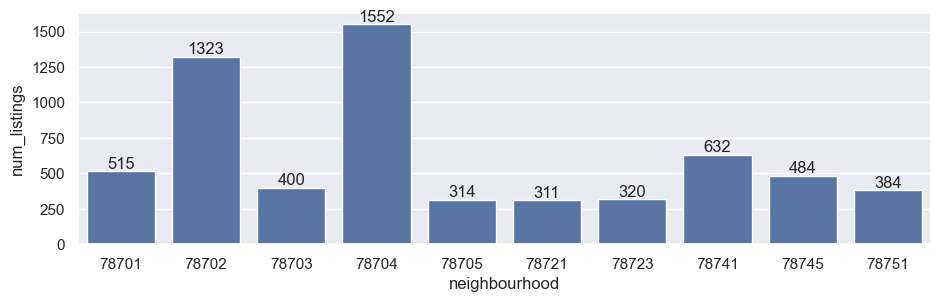

In [238]:
plth.plot_bar_graph('neighbourhood', 'num_listings', data=neighbourhood_listings_sorted, decimal_count=0, x_size=11, y_size=3)

In [239]:
# create and apply neighbourhood group filter

neighbourhood_grp_filtered_df = gph.get_filtered_df(neighbourhood_group_df)

avg_of_avg_ratings: 4.831627906976744, avg_num_listings: 223.25581395348837, avg_total_reviews: 12825.186046511628


In [240]:
# top 5 neighbourhoods by highest review_density

neighbourhood_review_density_sorted = gph.sort_group_df(neighbourhood_grp_filtered_df, 'review_density')
top_neighbourhood_review_density = neighbourhood_review_density_sorted.iloc[:5, [0, 1, -1]]

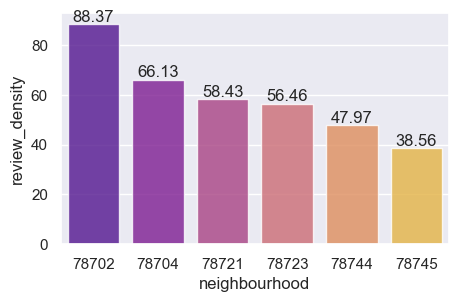

In [241]:
plth.plot_bar_graph('neighbourhood', 'review_density', data=neighbourhood_review_density_sorted, decimal_count=2, x_size=5, y_size=3, palette='plasma', alpha=0.8)

In [242]:
# top neighbourhoods by higest percentage of 5 star ratings and custom filter

neighbourhood_5_star_rating_sorted = gph.sort_group_df(neighbourhood_grp_filtered_df, '5_star_rating(%)')
top_neighbourhood_5_star_rating = neighbourhood_5_star_rating_sorted.iloc[:10, [0, 1, 3]]

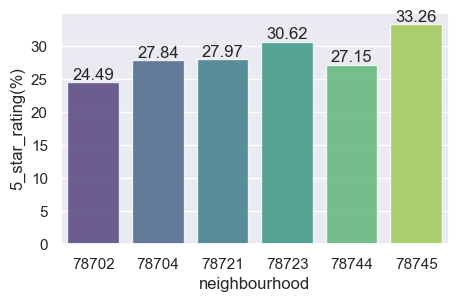

In [243]:
plth.plot_bar_graph('neighbourhood', '5_star_rating(%)', data=neighbourhood_5_star_rating_sorted, decimal_count=2, x_size=5, y_size=3, palette='viridis', alpha=0.8)

In [244]:
# get the combinations that have all three properties at best 
neighbourhood_intersection_df = gph.get_group_intersection_df(top_neighbourhood_listings, top_neighbourhood_review_density, top_neighbourhood_5_star_rating, ['neighbourhood'])
neighbourhood_intersection_df

,neighbourhood,num_listings,review_density,5_star_rating(%)
0,78704,1552,66.13,27.84
1,78702,1323,88.37,24.49


<h3 style='font-weight: 500; color: #52ff5b'> Results </h3>

- Neighbourhood 78704 has most listings followed by 78702

- 78702 has significantly better number of reviews per listing than others which means more public is active there followed by 78704 and 78721

- Both 78702 and 78704 have a bit lower percentage of 5 star ratings among the top five. So, it can be better to list a house aiming a 5 star in any these areas

### 2. Analysis by Property Type

In [245]:
# group data by property_type
prop_type_group_df = gph.get_grouped_df(df, 'property_type')

In [246]:
# top 10 property types by number of listings
prop_type_listings_sorted = gph.sort_group_df(prop_type_group_df, 'num_listings')
top_prop_type_listings = prop_type_listings_sorted.iloc[:10, :2]

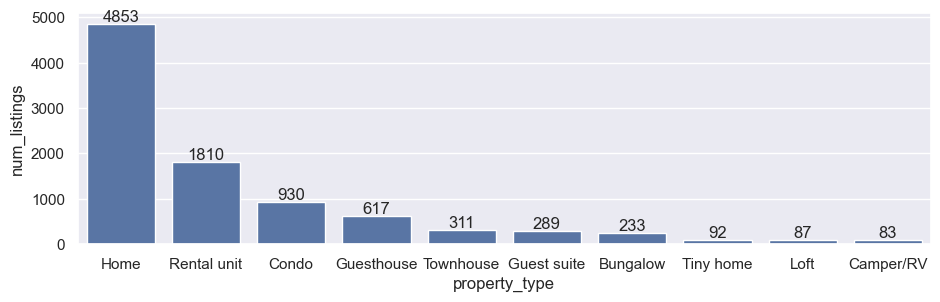

In [247]:
plth.plot_bar_graph('property_type', 'num_listings', data=prop_type_listings_sorted, decimal_count=0, x_size=11, y_size=3)

In [248]:
# create property type group filter

prop_type_grp_filtered_df = gph.get_filtered_df(prop_type_group_df)

avg_of_avg_ratings: 4.8265789473684215, avg_num_listings: 252.6315789473684, avg_total_reviews: 14512.71052631579


In [249]:
# check the reach for each type of property

prop_type_review_density_sorted = gph.sort_group_df(prop_type_grp_filtered_df, 'review_density')
top_prop_type_review_density = prop_type_review_density_sorted.iloc[:5, [0, 1, -1]]

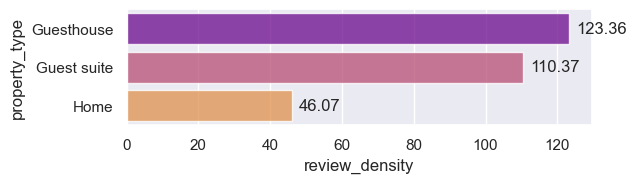

In [250]:
plth.plot_bar_graph('review_density', 'property_type', data=prop_type_review_density_sorted, decimal_count=2, x_size=6, y_size=1.5, type_ax='H', palette='plasma', alpha=0.8)

In [251]:
# top property types by higest percentage of 5 star ratings and custom filter

prop_type_5_star_rating_sorted = gph.sort_group_df(prop_type_grp_filtered_df, '5_star_rating(%)')
top_prop_type_5_star_rating = prop_type_5_star_rating_sorted.iloc[:10, [0, 1, 3]]

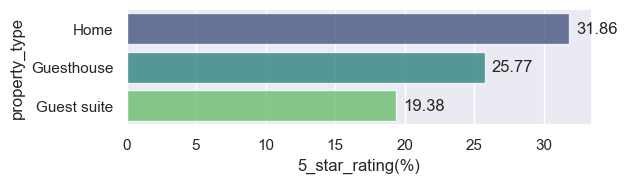

In [252]:
plth.plot_bar_graph('5_star_rating(%)', 'property_type', data=prop_type_5_star_rating_sorted, decimal_count=2, x_size=6, y_size=1.5, type_ax='H', palette='viridis', alpha=0.8)

In [253]:
# get the combinations that have all three properties at best 
property_type_intersection_df = gph.get_group_intersection_df(top_prop_type_listings, top_prop_type_review_density, top_prop_type_5_star_rating, ['property_type'])
property_type_intersection_df

,property_type,num_listings,review_density,5_star_rating(%)
0,Home,4853,46.07,31.86
1,Guesthouse,617,123.36,25.77
2,Guest suite,289,110.37,19.38


<h3 style='font-weight: 500; color: #52ff5b'> Results </h3>

- There are way more 'Homes' listed than any other types

- 'Guesthouses' and 'Guestsuites' may be lesser in numbers compared to 'Homes' but have got remarkably higher review density

- Again, listing a 'Guesthouse' or a 'Guestsuite' with facilites aiming a 5 star, gives better opportunity as the competition is a bit less

### 3. Analysis by Room Type

In [254]:
# group data by room_type
room_type_group_df = gph.get_grouped_df(df, 'room_type')

In [255]:
# top 10 room types by number of listings

room_type_listings_sorted = gph.sort_group_df(room_type_group_df, 'num_listings')
top_room_type_listings = room_type_listings_sorted.iloc[:10, :2]

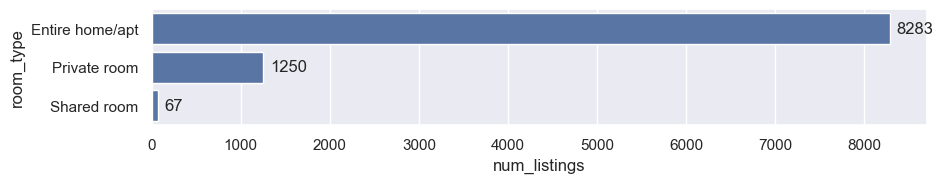

In [256]:
plth.plot_bar_graph('num_listings', 'room_type', data=room_type_listings_sorted, decimal_count=0, x_size=10, y_size=1.5, type_ax='H')

In [257]:
# check the need for each type of room

room_type_review_density_sorted = gph.sort_group_df(room_type_group_df, 'review_density')
top_room_type_review_density = room_type_review_density_sorted.iloc[:5, [0, 1, -1]]   # only one room type has been qualified

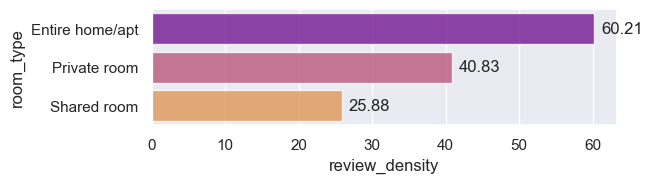

In [258]:
plth.plot_bar_graph('review_density', 'room_type', data=room_type_listings_sorted, decimal_count=2, x_size=6, y_size=1.5, type_ax='H', palette='plasma', alpha=0.8)

In [259]:
# room types by higest percentage of 5 star ratings and custom filter

room_type_5_star_rating_sorted = gph.sort_group_df(room_type_group_df, '5_star_rating(%)')
top_room_type_5_star_rating = room_type_5_star_rating_sorted.iloc[:10, [0, 1, 3]]  

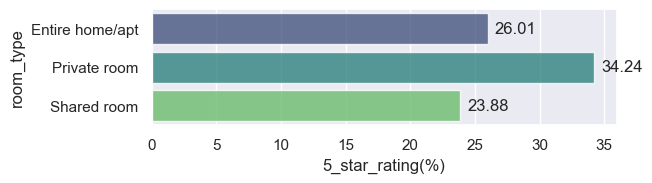

In [260]:
plth.plot_bar_graph('5_star_rating(%)', 'room_type', data=room_type_listings_sorted, decimal_count=2, x_size=6, y_size=1.5, type_ax='H', palette='viridis', alpha=0.8)

In [261]:
# get the combinations that have all three properties at best 
room_type_intersection_df = gph.get_group_intersection_df(top_room_type_listings, top_room_type_review_density, top_room_type_5_star_rating, ['room_type'])
room_type_intersection_df

,room_type,num_listings,review_density,5_star_rating(%)
0,Entire home/apt,8283,60.21,26.01
1,Private room,1250,40.83,34.24
2,Shared room,67,25.88,23.88


<h3 style='font-weight: 500; color: #52ff5b'> Results </h3>

- Properties listed with access to Entire Homes/Apartments are exceptionally higher compared to Private and Shared Rooms 

- However, listing properties with a Private room can be a good idea. As the review count per listing is moderate, also a good percentage of 5 star ratings, indicating a slightly lower competition and better oppotunity than listing Entire Homes

### 4. Analysis by number of bedrooms, beds, and bathooms

In [262]:
# group data by bedrooms, beds and bathrooms
bed_bath_group_df = gph.get_grouped_df(df, ['bedrooms', 'beds', 'bathrooms'])

In [263]:
len(bed_bath_group_df) # 399 different combinations of bedrooms, beds, and bathrooms to analyse from

399

In [264]:
# top 10 bed and bath combinations by number of listings

bed_bath_listings_sorted = gph.sort_group_df(bed_bath_group_df, 'num_listings')
top_bed_bath_listings = bed_bath_listings_sorted.iloc[:10, :4]
top_bed_bath_listings

,bedrooms,beds,bathrooms,num_listings
0,1.0,1,1.0,2362
1,1.0,2,1.0,853
2,2.0,2,1.0,606
3,2.0,2,2.0,485
4,3.0,3,2.0,452
5,0.5,1,1.0,340
6,2.0,3,2.0,277
7,2.0,3,1.0,270
8,3.0,4,2.0,247
9,1.0,1,1.5,218


In [265]:
# get filetered df for the bed and bath combination df

bed_bath_grp_filtered_df = gph.get_filtered_df(bed_bath_group_df)

avg_of_avg_ratings: 4.846992481203007, avg_num_listings: 24.06015037593985, avg_total_reviews: 1382.1629072681703


In [266]:
# feedback density for each type of combinations

bed_bath_review_density_sorted = gph.sort_group_df(bed_bath_grp_filtered_df, 'review_density')
top_bed_bath_review_density = bed_bath_review_density_sorted.iloc[:10, [0, 1, 2, 3, -1]]
top_bed_bath_review_density

,bedrooms,beds,bathrooms,num_listings,review_density
0,3.0,3,1.0,72,69.56
1,1.0,2,1.5,26,66.50
2,3.0,5,2.5,53,59.70
3,3.0,6,2.5,27,57.63
4,2.0,2,1.0,606,55.83
5,2.0,1,1.0,55,54.47
6,1.0,1,1.5,218,45.90
7,4.0,5,3.0,54,44.17
8,2.0,2,2.0,485,41.92
9,3.0,4,2.0,247,41.23


In [267]:
# combination with most 5 star ratings percentage

bed_bath_5_star_rating_sorted = gph.sort_group_df(bed_bath_grp_filtered_df, '5_star_rating(%)')
top_bed_bath_5_star_rating = bed_bath_5_star_rating_sorted.iloc[:10, [0, 1, 2, 3, 5]] 
top_bed_bath_5_star_rating 

,bedrooms,beds,bathrooms,num_listings,5_star_rating(%)
0,4.0,4,2.5,56,42.86
1,2.0,2,2.5,137,41.61
2,1.0,1,1.5,218,38.99
3,4.0,4,3.0,70,38.57
4,3.0,4,2.5,112,35.71
5,3.0,3,2.0,452,33.63
6,3.0,3,2.5,215,33.02
7,2.0,2,2.0,485,32.58
8,1.0,2,1.5,26,30.77
9,3.0,4,2.0,247,29.15


In [268]:
# get the combinations that have all three properties at best 
bed_bath_intersection_df = gph.get_group_intersection_df(top_bed_bath_listings, top_bed_bath_review_density, top_bed_bath_5_star_rating, ['bedrooms', 'beds', 'bathrooms'])
bed_bath_intersection_df

,bedrooms,beds,bathrooms,num_listings,review_density,5_star_rating(%)
0,2.0,2,2.0,485,41.92,32.58
1,3.0,4,2.0,247,41.23,29.15
2,1.0,1,1.5,218,45.90,38.99


<h3 style='font-weight: 500; color: #52ff5b'> Results </h3>

- Most listings are present with a combination of 1 bedroom, having 1 bed, and 1 bathroom

- The combination that can be used which have good propoptions of number of listings, review density and 5 star ratings in the format (bedrooms, beds, bathrooms) are (2, 2, 2), (3, 4, 2), (1, 1, 1.5)

- Another combination (3, 3, 1) which has not many listings but a review density of around 70 can also be tried

### 5. Analysis by Daily Price

In [269]:
# identify the outliers

from scipy.stats import zscore

daily_price_outliers = df[abs(zscore(df['daily_price'])) > 3]['daily_price'].tolist()
print(min(daily_price_outliers))    # any price equal or more than 1286 is an outlier

1286


In [270]:
print(f"Total outliers found: {len(daily_price_outliers)}")

Total outliers found: 121


In [271]:
# get a df with no outliers to understand the price distribution

price_df = df[abs(zscore(df['daily_price'])) <= 3]

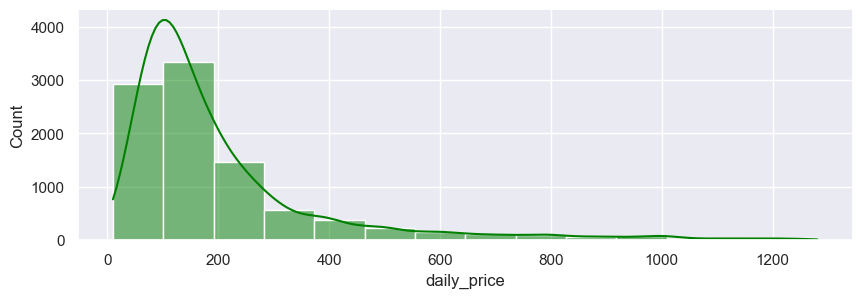

In [272]:
sns.set(rc={'figure.figsize': (10, 3)})

# set the width of each bin equal to price gap you want
price_gap = 90
bins = int((price_df['daily_price'].max() - price_df['daily_price'].min()) / price_gap)

hist = sns.histplot(x='daily_price', data=price_df, bins=bins, kde=True, color='green', alpha=0.5)

In [273]:
# in the distribution we can see most of the prices lie between 10 to 300

# create a bucket field for the field daily price

conditions = [
    (df['daily_price'] < 50),
    (df['daily_price'] < 100),
    (df['daily_price'] < 200),
    (df['daily_price'] < 350),
    (df['daily_price'] >= 350),
]

labels = ['< 50', '50-100', '100-200', '200-350', '> 350']

df['daily_price_bucket'] = np.select(conditions, labels, default='Unknown')
df.head()[['daily_price', 'daily_price_bucket']]  # see the categorized prices field

,daily_price,daily_price_bucket
0,126,100-200
1,45,< 50
2,57,50-100
3,159,100-200
4,48,< 50


In [274]:
# group the data by daily price bucket

daily_price_group_df = gph.get_grouped_df(df, 'daily_price_bucket')

In [275]:
# sort the group by most listings

daily_price_listings_sorted = gph.sort_group_df(daily_price_group_df, 'num_listings')
top_daily_price_listings = daily_price_listings_sorted.iloc[:, :2]

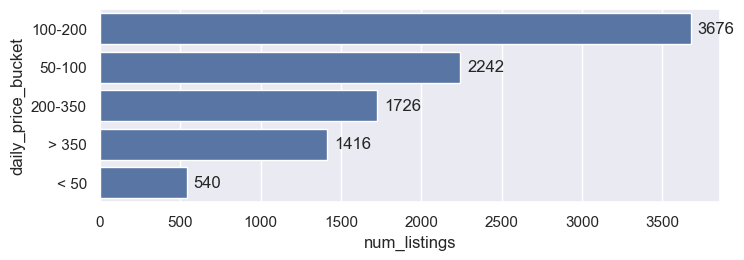

In [276]:
plth.plot_bar_graph('num_listings', 'daily_price_bucket', data=daily_price_listings_sorted, decimal_count=0, x_size=8, y_size=2.5, type_ax='H')

In [277]:
# check the review density for each price bucket

daily_price_review_density = gph.sort_group_df(daily_price_group_df, 'review_density').iloc[:, [0, 1, -1]]

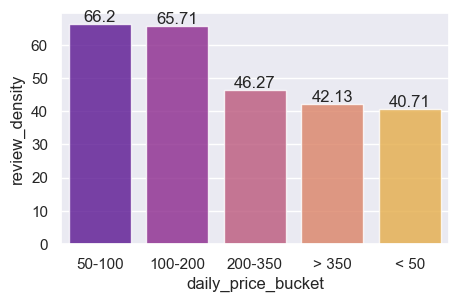

In [278]:
plth.plot_bar_graph('daily_price_bucket', 'review_density', data=daily_price_review_density, decimal_count=2, x_size=5, y_size=3, palette='plasma', alpha=0.8)

In [279]:
# check the 5 star ratings percentage for each price bucket

daily_price_5_star_ratings = gph.sort_group_df(daily_price_group_df, '5_star_rating(%)').iloc[:, [0, 1, 3]]

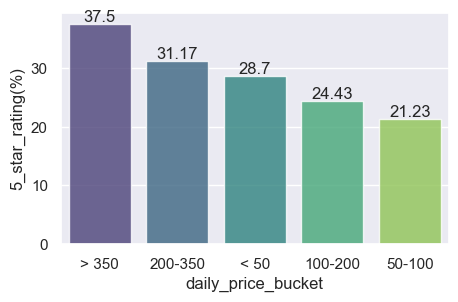

In [280]:
plth.plot_bar_graph('daily_price_bucket', '5_star_rating(%)', data=daily_price_5_star_ratings, decimal_count=2, x_size=5, y_size=3, palette='viridis', alpha=0.8)

<h3 style='font-weight: 500; color: #52ff5b'> Results </h3>

- Most of the listings are in a price range of 100 to 200, which is approx 1.5 times to the second in the list

- Listings with prices between 50 and 100 can be targeted as they are the second most in listings, but with the highest review density

- Also the lower 5 star ratings percentage indicates a better opportunity

### 6. Analysis by Minimum Nights to Stay

In [281]:
# identify the outliers

min_nights_outliers = df[abs(zscore(df['minimum_nights'])) > 3]['minimum_nights'].tolist()
print(min(min_nights_outliers))    # any price equal or more than 120 is an outlier

120


In [282]:
print(f"Total outliers found: {len(min_nights_outliers)}")

Total outliers found: 31


In [283]:
# get a df with no outliers to understand the price distribution

min_nights_df = df[abs(zscore(df['minimum_nights'])) <= 3]

(0.0, 50.0)

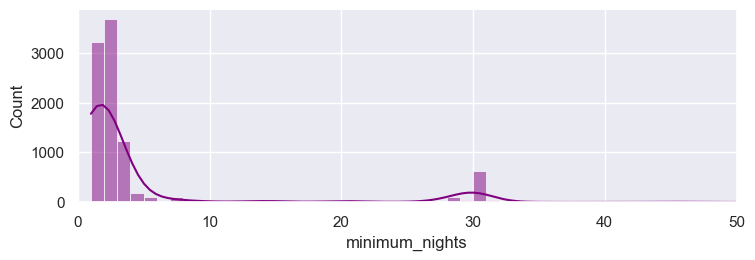

In [284]:
sns.set(rc={'figure.figsize': (8.5, 2.5)})

# set the width of each bin equal to price gap you want
min_nights_gap = 1
bins = int((min_nights_df['minimum_nights'].max() - min_nights_df['minimum_nights'].min()) / min_nights_gap)

hist = sns.histplot(x='minimum_nights', data=min_nights_df, bins=bins, kde=True, color='purple', alpha=0.5)
plt.xlim(0, 50)

In [285]:
# get the grouped data by minimum number of nights

min_nights_group_df = gph.get_grouped_df(min_nights_df, 'minimum_nights')

In [286]:
# top 10 minimum stay times by number of listings

min_nights_listings_sorted = gph.sort_group_df(min_nights_group_df, 'num_listings')
top_min_nights_listings = min_nights_listings_sorted.iloc[:10, :2]

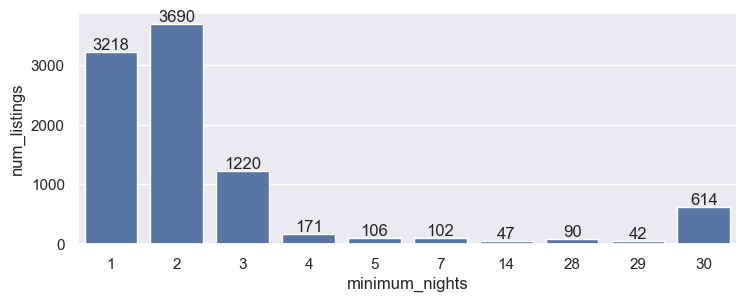

In [287]:
plth.plot_bar_graph(x='minimum_nights', y='num_listings', data=top_min_nights_listings, decimal_count=0, x_size=8.5, y_size=3)

In [288]:
# create minimum nights group filter

min_nights_grp_filtered_df = gph.get_filtered_df(min_nights_group_df, ratings_threshold=4.75)

avg_of_avg_ratings: 4.75, avg_num_listings: 299.03125, avg_total_reviews: 17206.71875


In [289]:
# top 5 minimum stay times by highest review_density

min_nights_review_density_sorted = gph.sort_group_df(min_nights_grp_filtered_df, 'review_density')
top_min_nights_review_density = min_nights_review_density_sorted.iloc[:5, [0, 1, -1]]

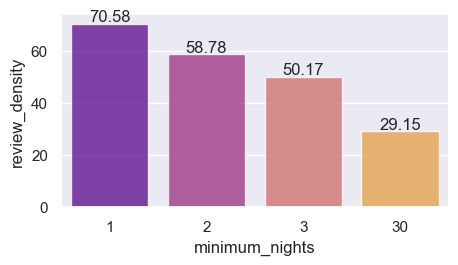

In [290]:
plth.plot_bar_graph('minimum_nights', 'review_density', data=min_nights_review_density_sorted, decimal_count=2, x_size=5, y_size=2.5, palette='plasma', alpha=0.8)

In [291]:
# stay times by higest percentage of 5 star ratings

min_nights_5_star_rating_sorted = gph.sort_group_df(min_nights_grp_filtered_df, '5_star_rating(%)')
top_min_nights_5_star_rating = min_nights_5_star_rating_sorted.iloc[:10, [0, 1, 3]]

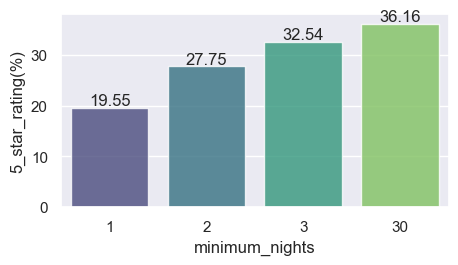

In [292]:
plth.plot_bar_graph('minimum_nights', '5_star_rating(%)', data=min_nights_5_star_rating_sorted, decimal_count=2, x_size=5, y_size=2.5, palette='viridis', alpha=0.8)

<h3 style='font-weight: 500; color: #52ff5b'> Results </h3>

- Most of the listings require at least 1 or 2 nights stay followed by 3 and around a month

- Houses with at least one night stay have got the best review density and significanlty lower 5 star rating percentage, which indicates that listing a house with best possible requirements can be great

- On the other side, to be more opportunistic and to avoid high competition, listings with at least a month stay can also be preferred 

### 7. Analysis of Hosts

In [293]:
# create a group df by host id and name

host_group_df = gph.get_grouped_df(df, ['host_id', 'host_name'])

In [294]:
# top hosts by number of listings

host_group_listings_sorted = gph.sort_group_df(host_group_df, 'num_listings')
top_host_group_listings = host_group_listings_sorted.iloc[:5, :3]
top_host_group_listings

,host_id,host_name,num_listings
0,274552333,Evonify,102
1,464404919,Vacasa Texas,83
2,35817561,Jen And Steven,69
3,8167447,Martin,66
4,118565935,Renters Club,56


In [295]:
# create a filtered df for hosts

host_grp_filtered_df = gph.get_filtered_df(host_group_df, listings_threshold=10, total_reviews_threshold=500)

avg_of_avg_ratings: 4.867111449348893, avg_num_listings: 10, avg_total_reviews: 500


In [296]:
# top 3 hosts whose listings have got the best review density

host_group_review_density = gph.sort_group_df(host_grp_filtered_df, 'review_density')
top_host_group_review_density = host_group_review_density.iloc[:3, [0, 1, 2, -1]]
top_host_group_review_density

,host_id,host_name,num_listings,review_density
0,2934425,Brett,12,267.17
1,814883,Kristen,12,95.83
2,499072196,Lisa,11,91.82


In [297]:
# top 3 hosts who have got the best 5 star ratings percentage

host_group_5_star_rating = gph.sort_group_df(host_grp_filtered_df, '5_star_rating(%)')
top_host_group_5_star_rating = host_group_5_star_rating.iloc[:3, [0, 1, 2, 4]]
top_host_group_5_star_rating

,host_id,host_name,num_listings,5_star_rating(%)
0,256882822,Annette,14,50.00
1,30225950,Eastside Villas,20,40.00
2,814883,Kristen,12,33.33


<h3 style='font-weight: 500; color: #52ff5b'> Results </h3>

- Evonify with a host if 2934425 has listed most number of houses

- You could contact any of all of the top 3 hosts in both sections (reviews and 5 star ratings) for quality purposes 

### Top 3 listings

In [298]:
# that have got most number of reviews

total_review_sorted = df.sort_values(by=['number_of_reviews'], ascending=False)
total_review_top_3 = total_review_sorted.iloc[:3, :]
total_review_top_3

,host_id,host_name,property_type,bedrooms,beds,bathrooms,ratings,neighbourhood,latitude,longitude,room_type,daily_price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,daily_price_bucket
308,740347,Chris,Home,1.0,1,1.0,4.95,78704,30.24668,-97.75618,Entire home/apt,144,1,1141,2023-09-03,9.49,2,315,110,100-200
250,5152543,Marcella,Camper/RV,1.0,1,1.0,4.89,78723,30.29757,-97.68266,Entire home/apt,75,1,1140,2023-08-24,8.89,2,326,76,50-100
462,5152543,Marcella,Guesthouse,1.0,1,1.0,4.89,78723,30.29736,-97.68232,Entire home/apt,79,1,1026,2023-08-24,8.88,2,304,79,50-100


In [299]:
# that have got 5 star ratings sorted by number of reviews

tot_review_five_star_rating_sorted = total_review_sorted[total_review_sorted['ratings'] == 5]

five_star_rating_top_3 = tot_review_five_star_rating_sorted.iloc[:3, :]
five_star_rating_top_3

,host_id,host_name,property_type,bedrooms,beds,bathrooms,ratings,neighbourhood,latitude,longitude,room_type,daily_price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,daily_price_bucket
2315,2405754,Sarah Roxie,Guesthouse,1.0,2,1.0,5.0,78722,30.28858,-97.71418,Entire home/apt,126,3,246,2023-08-31,3.75,1,149,44,100-200
2982,132665147,Kimberly,Cottage,2.0,2,2.0,5.0,78734,30.41678,-97.92663,Entire home/apt,197,1,237,2023-08-27,4.06,3,351,61,100-200
3697,298907305,Justin And Deb,Home,1.0,2,1.0,5.0,78751,30.30953,-97.71699,Entire home/apt,102,2,226,2023-08-21,4.77,1,54,56,100-200
